<a href="https://colab.research.google.com/github/zhangzixuan1997/Python/blob/master/Multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv")
df.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Firstly Lets see a binary classification example

In [0]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import auc,roc_curve
x_cols = df.columns.drop("diagnosis").drop("id")
for col in x_cols:
  df[col] = zscore(df[col])#normalize the data
#Convert to numpy 
x = df[x_cols].values
y = df["diagnosis"].map({'M':1,'B':0}).values

# The following two functions are from Jeff Heaton Github.
# https://github.com/jeffheaton/t81_558_deep_learning

def plot_confusion_matrix(cm,names,title="Confusion Matrix",cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation="nearest",cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arage(len(names))
  plt.xticks(tick_marks,names,rotation=45)
  plt.yticks(tick_marks,names)
  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")

def plot_ROC(pred,y):
  fpr,tpr,_ = roc_curve( y,pred) #Return false positive rate, true positive rate and the threshold.
  roc_auc = auc(fpr,tpr)

  plt.figure()
  plt.plot(fpr,tpr,label="ROC curve(area = %0.2f)" %roc_auc)
  plt.plot([0,1],[0,1],"k--")
  plt.xlim([0,1.0])
  plt.ylim([0,1.1])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristics")
  plt.legend(loc="lower right")
  plt.show()

# Classification Neural Network 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=97
)

In [4]:
model = Sequential()
model.add(Dense(100,input_dim=x.shape[1],activation="relu",kernel_initializer="random_normal"))
model.add(Dense(50,activation="relu",kernel_initializer="random_normal"))
model.add(Dense(25,activation="relu",kernel_initializer="random_normal"))
model.add(Dense(1,activation="sigmoid",kernel_initializer="random_normal"))
model.compile(loss="binary_crossentropy", optimizer = "adam",metrics=["accuracy"])

monitor = EarlyStopping(monitor="val_loss",min_delta=1e-3,
                      patience=3,verbose=1,mode="auto", baseline=None, restore_best_weights=True)
#0 = silent, 1 = progress bar, 2 = one line per epoch.  
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
15/15 - 0s - loss: 0.6854 - accuracy: 0.8549 - val_loss: 0.6668 - val_accuracy: 0.9474
Epoch 2/1000
15/15 - 0s - loss: 0.6146 - accuracy: 0.9385 - val_loss: 0.5167 - val_accuracy: 0.9474
Epoch 3/1000
15/15 - 0s - loss: 0.3788 - accuracy: 0.9473 - val_loss: 0.2163 - val_accuracy: 0.9386
Epoch 4/1000
15/15 - 0s - loss: 0.1551 - accuracy: 0.9516 - val_loss: 0.0864 - val_accuracy: 0.9737
Epoch 5/1000
15/15 - 0s - loss: 0.1001 - accuracy: 0.9648 - val_loss: 0.0555 - val_accuracy: 0.9825
Epoch 6/1000
15/15 - 0s - loss: 0.0799 - accuracy: 0.9780 - val_loss: 0.0481 - val_accuracy: 0.9825
Epoch 7/1000
15/15 - 0s - loss: 0.0734 - accuracy: 0.9780 - val_loss: 0.0496 - val_accuracy: 0.9825
Epoch 8/1000
15/15 - 0s - loss: 0.0673 - accuracy: 0.9824 - val_loss: 0.0395 - val_accuracy: 0.9825
Epoch 9/1000
15/15 - 0s - loss: 0.0624 - accuracy: 0.9824 - val_loss: 0.0356 - val_accuracy: 0.9912
Epoch 10/1000
15/15 - 0s - loss: 0.0580 - accuracy: 0.9846 - val_loss: 0.0372 - val_accuracy: 0.9825

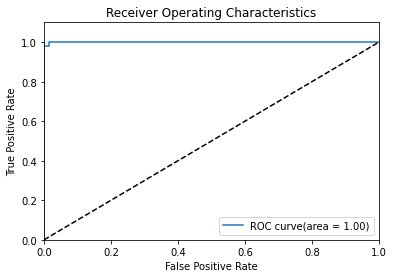

In [5]:
#As we can see, we stopped really early since this is an "easy" dataset
pred = model.predict(x_test)
plot_ROC(pred,y_test)

Then lets check the multi-classification

In [0]:
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",na_values=['NA','?'])


df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)


df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

df['income'] = zscore(df['income'].fillna(df['income'].median()))
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])


x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # Classification
products = dummies.columns
y = dummies.values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',
                kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(y.shape[1],activation='softmax',
                kernel_initializer='random_normal'))
model.compile(loss='categorical_crossentropy',  # for multiclassification, we 
              #use "categorical_crossentropy"
              optimizer="adam",
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
47/47 - 0s - loss: 1.5069 - accuracy: 0.4420 - val_loss: 1.1408 - val_accuracy: 0.4980
Epoch 2/1000
47/47 - 0s - loss: 1.1345 - accuracy: 0.4807 - val_loss: 1.0807 - val_accuracy: 0.5120
Epoch 3/1000
47/47 - 0s - loss: 1.0478 - accuracy: 0.5460 - val_loss: 0.9643 - val_accuracy: 0.6140
Epoch 4/1000
47/47 - 0s - loss: 0.8797 - accuracy: 0.6560 - val_loss: 0.8998 - val_accuracy: 0.6320
Epoch 5/1000
47/47 - 0s - loss: 0.8094 - accuracy: 0.6673 - val_loss: 0.8327 - val_accuracy: 0.6560
Epoch 6/1000
47/47 - 0s - loss: 0.7772 - accuracy: 0.6940 - val_loss: 0.8024 - val_accuracy: 0.6780
Epoch 7/1000
47/47 - 0s - loss: 0.7568 - accuracy: 0.6933 - val_loss: 0.7912 - val_accuracy: 0.6980
Epoch 8/1000
47/47 - 0s - loss: 0.7458 - accuracy: 0.6933 - val_loss: 0.7877 - val_accuracy: 0.6940
Epoch 9/1000
47/47 - 0s - loss: 0.7330 - accuracy: 0.7007 - val_loss: 0.7797 - val_accuracy: 0.6860
Epoch 10/1000
47/47 - 0s - loss: 0.7245 - accuracy: 0.7000 - val_loss: 0.8115 - val_accuracy: 0.6540

In [18]:
from sklearn import metrics
pred = model.predict(x_test) # probabilities
pred = np.argmax(pred,axis=1) # classes
y_compare = np.argmax(y_test,axis=1)
accuracy_score = metrics.accuracy_score(y_compare,pred)
print("the accuracy score is {}".format(accuracy_score))

the accuracy score is 0.696


AttributeError: ignored

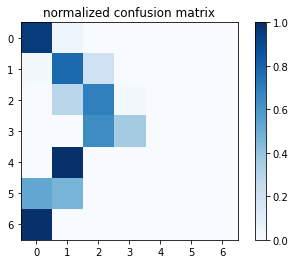

In [21]:
# It was not a fairly well multi-classification
# Lets check which part went wrong
import numpy as np
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_compare,pred)
np.set_printoptions(precision=2)
#Normalize the confusion matrix by row(number of samples in each class)
cm_normalized = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized,products,title="normalized confusion matrix")
plt.show() 

#Here you can ignore the error since it is my numpy problem (np.arange)
#As we can see in the plot, the diagonal went wrong when it misclassified 
#0 as 5 and 6, 1 as 4 and 5. 